In [1]:
### import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
sns.set_style('whitegrid')

## library untuk prerpocessing text
import csv
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

## Library untuk vectorized
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

## Library untuk pemodelan klasifikasi
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

## Library untuk evaluasa
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
pd.set_option('max_colwidth', 180)

##### LOAD DATA
df = pd.read_csv("./xiaomi2019.csv", sep=";", encoding="ISO-8859-1")
df.head()

,tweet,sentiment
0,pake hp xiaomi bisa kan,Positive
1,Xiaomi yi action kamera bagus juga buat video bisa di jadikan pertimbangan nihhh,Positive
2,Ya Allah jauhkanlah aku dari godaan clickbait line today dan berita-berita di browser xiaomi,Positive
3,hpmu opo se? kok sawangane jernih koyok iph â Xiaomi euy:' https://lap78.ask.fm/igoto/45DKECPW7B667HQMHN2IG6NM7SOD5OAUS7QPPAN4D7ROV45V2Q24OJAMGBFM2RRQK2272FYJJNWDWXQVYYU5Y25C...,Positive
4,numpang nanya itu hapenya xiaomi bukan ya? Kalo iya tipe apa? Jernih kameranya mirip iphone,Positive


In [2]:
##### EXPLORE DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      101 non-null    object
 1   sentiment  101 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


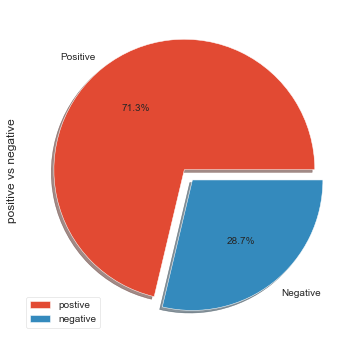

In [3]:
df["sentiment"].value_counts().plot(kind="pie", explode=[0, 0.1], figsize=(6,6), autopct="%1.1f%%", shadow=True)
plt.ylabel("positive vs negative")
plt.legend(["postive", "negative"])
plt.show()

In [4]:
#Len berfungsi untuk menghitung panjang karakter
df["length"]=df["tweet"].apply(len)
df.head()

,tweet,sentiment,length
0,pake hp xiaomi bisa kan,Positive,23
1,Xiaomi yi action kamera bagus juga buat video bisa di jadikan pertimbangan nihhh,Positive,80
2,Ya Allah jauhkanlah aku dari godaan clickbait line today dan berita-berita di browser xiaomi,Positive,92
3,hpmu opo se? kok sawangane jernih koyok iph â Xiaomi euy:' https://lap78.ask.fm/igoto/45DKECPW7B667HQMHN2IG6NM7SOD5OAUS7QPPAN4D7ROV45V2Q24OJAMGBFM2RRQK2272FYJJNWDWXQVYYU5Y25C...,Positive,309
4,numpang nanya itu hapenya xiaomi bukan ya? Kalo iya tipe apa? Jernih kameranya mirip iphone,Positive,91


In [5]:
#Dengan menggunakan fungsi getWordCount dapat menghitung jumlah kata dalam bentuk array serta jumlah karakter yang dipresentasikan dalam angka
arr = df["tweet"].to_numpy()
def getWordCount(tweet):
  wordCount = list(map(len, tweet.split()))
  return wordCount
result = map(getWordCount, arr)
df["wordCount"]=list(result)
df.head()

,tweet,sentiment,length,wordCount
0,pake hp xiaomi bisa kan,Positive,23,"[4, 2, 6, 4, 3]"
1,Xiaomi yi action kamera bagus juga buat video bisa di jadikan pertimbangan nihhh,Positive,80,"[6, 2, 6, 6, 5, 4, 4, 5, 4, 2, 7, 12, 5]"
2,Ya Allah jauhkanlah aku dari godaan clickbait line today dan berita-berita di browser xiaomi,Positive,92,"[2, 5, 10, 3, 4, 6, 9, 4, 5, 3, 13, 2, 7, 6]"
3,hpmu opo se? kok sawangane jernih koyok iph â Xiaomi euy:' https://lap78.ask.fm/igoto/45DKECPW7B667HQMHN2IG6NM7SOD5OAUS7QPPAN4D7ROV45V2Q24OJAMGBFM2RRQK2272FYJJNWDWXQVYYU5Y25C...,Positive,309,"[4, 3, 3, 3, 9, 6, 5, 3, 3, 6, 5, 244, 3]"
4,numpang nanya itu hapenya xiaomi bukan ya? Kalo iya tipe apa? Jernih kameranya mirip iphone,Positive,91,"[7, 5, 3, 7, 6, 5, 3, 4, 3, 4, 4, 6, 9, 5, 6]"


In [6]:
df["tweetLength"] = df["tweet"].apply(len)
df["tweetLength"].describe()

count    101.00000
mean      76.80198
std       56.98895
min        7.00000
25%       36.00000
50%       60.00000
75%       99.00000
max      309.00000
Name: tweetLength, dtype: float64

In [7]:
##### CLEANING DATA
def clean_text(text):
    # Mengubah semua karakter huruf menjadi huruf kecil
  text=text.lower()
    # Menghilangkan nama akun
  text=re.sub("@[^\s]+", "", text)
    # Menghilangkan angka
  text=re.sub("\w*\d\w", "", text)
    # Menghilangkan URL
  text=re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', "", text)
  text=re.sub(r'(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w\.-]*)*\/?\S', "", text)
    # Menghilangkan Hashtag
  text=re.sub("#[^\s]+", "", text)
    # Menghilangkan Huruf Tanggal
  text=re.sub(r'\b[a-zA-Z]\b', "", text)
  return text
clean = lambda x: clean_text(x)
dfx=pd.DataFrame(df.tweet.apply(clean))
dfx

,tweet
0,pake hp xiaomi bisa kan
1,xiaomi yi action kamera bagus juga buat video bisa di jadikan pertimbangan nihhh
2,ya allah jauhkanlah aku dari godaan clickbait line today dan berita-berita di browser xiaomi
3,hpmu opo se? kok sawangane jernih koyok iph â xiaomi euy:' ==â â¦
4,numpang nanya itu hapenya xiaomi bukan ya? kalo iya tipe apa? jernih kameranya mirip iphone
...,...
96,xiaomi bagus ka hehe
97,baru tahu kalo xiaomi bisa screen record wkwkwk
98,bgst mau nanya disini ada yg xiaomi mi ya susah cari sinyal ga semenjak update ke patch juni ?
99,"hp aku gitu dulu xiaomi, tapi ga sampe ke konter ku cari di google alhamdulillah bisa itu siapa tau bootlop nder kalo bootlop gausah ke konter:( sayang uangnya."


In [8]:
def Punctuation(string):
    
  # Punctuation marks
  punctuation='''!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~'''
    
    # Traverse the given string and if any punctuation marks occur replace it with null
    # Marks occur replace it with null
  for x in string.lower():
    if x in punctuation:
      string = string.replace(x, "")

    # Print string without punctuation
  return(string)

cleanPunc = lambda x: Punctuation(x)
dfx=pd.DataFrame(dfx.tweet.apply(cleanPunc))
dfx

,tweet
0,pake hp xiaomi bisa kan
1,xiaomi yi action kamera bagus juga buat video bisa di jadikan pertimbangan nihhh
2,ya allah jauhkanlah aku dari godaan clickbait line today dan beritaberita di browser xiaomi
3,hpmu opo se kok sawangane jernih koyok iph â xiaomi euy â â¦
4,numpang nanya itu hapenya xiaomi bukan ya kalo iya tipe apa jernih kameranya mirip iphone
...,...
96,xiaomi bagus ka hehe
97,baru tahu kalo xiaomi bisa screen record wkwkwk
98,bgst mau nanya disini ada yg xiaomi mi ya susah cari sinyal ga semenjak update ke patch juni
99,hp aku gitu dulu xiaomi tapi ga sampe ke konter ku cari di google alhamdulillah bisa itu siapa tau bootlop nder kalo bootlop gausah ke konter sayang uangnya


In [9]:
#Catatan: setiap selesai di proses, cek hasilnya, apakah ada yang berbeda? Ada

In [10]:
##### STOPWORD REMOVAL
def get_stopword(stopwordsfile):
  stopwords=[]
  file_stopwords=open(stopwordsfile, 'r')
  row= file_stopwords.readline()
  while row:
    word=row.strip()
    stopwords.append(word)
    row=file_stopwords.readline()
  file_stopwords.close()
  return stopwords
stop_words_indo=get_stopword("./stopwordsindo.txt")

In [11]:
def stopwords(text):
  tokens = word_tokenize(text)
  filtered = []

  for w in tokens:
    if w not in stop_words_indo:
      filtered.append(w)

  hasil=' '.join(filtered)
  return hasil

st=lambda x: stopwords(x)

In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\afusi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
dfx = pd.DataFrame(dfx.tweet.apply(st))
dfx.head()

,tweet
0,pake hp xiaomi
1,xiaomi yi action kamera bagus video jadikan pertimbangan nihhh
2,ya allah jauhkanlah godaan clickbait line today beritaberita browser xiaomi
3,hpmu opo sawangane jernih koyok iph â xiaomi euy â â¦
4,numpang nanya hapenya xiaomi ya kalo iya tipe jernih kameranya iphone


In [14]:
#Catatan: apakah ada yang berubah dengan luaran sebelumnya? Apa yang berubah? banyak kata tidak penting yang dibuang

In [15]:
##### STEMMING
def stemming(text):
  factory_stem=StemmerFactory()
  stemmer=factory_stem.create_stemmer()
  text=stemmer.stem(text)
  return text

stem = lambda x: stemming(x)
dfx = pd.DataFrame(dfx.tweet.apply(stem))
dfx.head()

,tweet
0,pake hp xiaomi
1,xiaomi yi action kamera bagus video jadi timbang nihhh
2,ya allah jauh goda clickbait line today beritaberita browser xiaomi
3,hpmu opo sawangane jernih koyok iph xiaomi euy
4,numpang nanya hapenya xiaomi ya kalo iya tipe jernih kamera iphone


In [16]:
#Catatan: apakah ada yang berubah dengan luaran sebelumnya? Apa yang berubah? semua menjadi kata dasar

In [17]:
##### GABUNG DENGAN ATRIBUT KELAS
dfx["sentiment"]=df["sentiment"]
dfx

,tweet,sentiment
0,pake hp xiaomi,Positive
1,xiaomi yi action kamera bagus video jadi timbang nihhh,Positive
2,ya allah jauh goda clickbait line today beritaberita browser xiaomi,Positive
3,hpmu opo sawangane jernih koyok iph xiaomi euy,Positive
4,numpang nanya hapenya xiaomi ya kalo iya tipe jernih kamera iphone,Positive
...,...,...
96,xiaomi bagus ka hehe,Positive
97,kalo xiaomi screen record wkwkwk,Positive
98,bgst nanya yg xiaomi mi ya susah cari sinyal ga semenjak update patch juni,Negative
99,hp gitu xiaomi ga sampe konter ku cari google alhamdulillah tau bootlop nder kalo bootlop gausah konter sayang uang,Negative


In [18]:
##### VECTORIZED
vectorizer = TfidfVectorizer(use_idf=True, strip_accents="ascii")

In [19]:
##### PEMBUATAN MODEL KLASIFIKASI
y= dfx.sentiment
X= dfx.tweet

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect=vectorizer.transform(X_test)

#Multinomial Naive Bayes
mnb = MultinomialNB()

mnb.fit(X_train_vect, y_train)
y_pred = mnb.predict(X_test_vect)

accuracy_score(y_test, y_pred)

0.6774193548387096

In [21]:
##### LATIHAN
from sklearn.metrics import classification_report, confusion_matrix
#Confusion matrix
print(confusion_matrix(y_test, y_pred))

[[ 0 10]
 [ 0 21]]


In [22]:
# Precision, recall, dll
print(classification_report(y_test, y_pred, zero_division="warn"))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        10
    Positive       0.68      1.00      0.81        21

    accuracy                           0.68        31
   macro avg       0.34      0.50      0.40        31
weighted avg       0.46      0.68      0.55        31



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
#Ini berarti bahwa tidak ada skor-F yang dihitung untuk label ini, dan dengan demikian skor-F untuk kasus ini dianggap 0,0. Karena Anda meminta skor rata-rata, Anda harus memperhitungkan bahwa skor 0 disertakan dalam perhitungan, dan inilah mengapa scikit-learn menunjukkan peringatan itu kepada Anda.

In [24]:
#Cross val
X_val=vectorizer.fit_transform(X)
from sklearn.model_selection import cross_val_score
print("MNB")
scores_accuracy_mnb = cross_val_score(mnb, X_val, y, cv=10, scoring='accuracy')
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_mnb.mean(), scores_accuracy_mnb.std()))

scores_precision_mnb = cross_val_score(mnb, X_val, y, cv=10, scoring='precision_macro')
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_mnb.mean(), scores_precision_mnb.std()))

scores_recall_mnb = cross_val_score(mnb, X_val, y, cv=10, scoring='recall_macro')
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_mnb.mean(), scores_recall_mnb.std()))

scores_f1_mnb = cross_val_score(mnb, X_val, y, cv=10, scoring='f1_macro')
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_mnb.mean(), scores_f1_mnb.std()))

MNB
Rata-rata nilai akurasi: 0.71 (+/- 0.03)
Rata-rata nilai precision macro: 0.36 (+/- 0.02)
Rata-rata nilai recall macro: 0.50 (+/- 0.00)
Rata-rata nilai f1 macro: 0.42 (+/- 0.01)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedM